# Лабораторная работа 12. Многозадачность: процессы и потоки.

Многозадачность (параллельность исполнения) – расщепление последовательности выполнения программы на несколько самостоятельных (возможно, со своими локальными переменными, стеками и т.п.) подпрограмм, выполняющих каждый свою задачу и не отвлекающихся на то, как реализованы решения смежных задач, и выполнение этих подпрограмм одновременно (в каком-то смысле).

Подходы к реализации:

- процессы – каждая задача выполняется в своём изолированном процессе естественно, многозадачность вытесняющая, изоляция означает и большую надёжность, и меньшие возможности по взаимодействию; 
- потоки – каждая задача выполняется в своём потоке ОС или виртуальной машины, распределение по ядрам и переключения внезапные (вытесняющая многозадачность), но все задачи существуют в едином пространстве и могут обмениваться данными через общую память;
- сопрограммы – фрагменты задач поочерёдно выполняются в рамках одного и того же потока, переключения явные (кооперативная многозадачность).

# 1. Процессы

Ветвление процессов является традиционным способом организации параллельных вычислений и представляет собой фундаментальную часть инструментального набора Unix. Ветвление процессов – это самый простой способ запуска независимых программ, как отличных, так и не отличных от вызывающей программы.

После операции ветвления исходный экземпляр программы называется родительским процессом, а копия, созданная с помощью функции `os.fork`, называется дочерним процессом. Вообще говоря, родитель может воспроизвести любое число потомков, а потомки могут создать собственные дочерние процессы – все ответвленные процессы выполняются независимо и параллельно под управлением операционной системы, и дочерние процессы могут продолжать выполняться даже после завершения родительского процесса.

Поскольку эта функция создает копию вызывающей программы, она возвращает различные значения в каждой копии: ноль – в дочернем процессе и числовой идентификатор ID процесса нового потомка – в родительском процессе.

Поскольку ветвление процессов является частью модели программирования в Unix, этот сценарий замечательно будет функционировать в Unix, Linux и в современных версиях Mac OS. К сожалению, этот сценарий не будет работать под управлением стандартной версии Python в Windows, потому что функция `fork` не стыкуется с моделью Windows. 

Тем не менее в Windows сценарии на языке Python всегда могут порождать потоки выполнения, а также использовать пакет multiprocessing. Этот модуль обеспечивает альтернативный и переносимый способ запуска процессов. Другим вариантом является использование Python вместе с системами типа Cygwin, обеспечивающих полную Unix-подобную функциональность для Windows.

Для работы с библиотекой `multiprocessing` и запуска параллельных процессов можно использовать среду [PyCharm](https://www.jetbrains.com/ru-ru/pycharm/download/#section=windows).

# `multiprocessing`


[Документация Python](https://docs.python.org/3/library/multiprocessing.html)

In [1]:
import multiprocessing

multiprocessing.cpu_count()

2

Процесс как поток и взаимодействие порождающих и порождаемых потоков:

In [1]:
# import multiprocessing

import multiprocessing.dummy as multiprocessing
from os import getpid
import time

def clock(interval):
    n=10
    while bool(n):
        print(n, " I'm process", getpid(), 'The time is %s' % time.ctime())
        time.sleep(interval)
        n-=1

if __name__ == '__main__':
    p = multiprocessing.Process(target=clock, args=(2,))
    print('start')
    p.start()
    p.join(10)
    print('end')

start
10  I'm process 60745 The time is Fri May 22 12:56:13 2020
9  I'm process 60745 The time is Fri May 22 12:56:15 2020
8  I'm process 60745 The time is Fri May 22 12:56:17 2020
7  I'm process 60745 The time is Fri May 22 12:56:19 2020
6  I'm process 60745 The time is Fri May 22 12:56:21 2020
end
5  I'm process 60745 The time is Fri May 22 12:56:23 2020
4  I'm process 60745 The time is Fri May 22 12:56:25 2020


In [2]:
print(" I'm PROCESS", getpid(),'hahaha!!!')

 I'm PROCESS 60745 hahaha!!!
3  I'm process 60745 The time is Fri May 22 12:56:27 2020
2  I'm process 60745 The time is Fri May 22 12:56:29 2020
1  I'm process 60745 The time is Fri May 22 12:56:31 2020


# Пулы процессов

Пусть есть три функции `a`, `b` ,`c`: 

In [3]:
def a(x):
    time.sleep(x)
    print('a выполнен')
    return 'a'
def b(x):
    time.sleep(x)
    print('b выполнен')    
    return 'b'
def c(x):
    time.sleep(x)
    print('c выполнен')    
    return 'c'

Их необходимо вызвать в отдельных потоках (процессах), дождаться результата их выполнения и выдать ответ:

In [4]:
if __name__ == '__main__':

    time_a = 2
    time_b = 4
    time_c = 1

    t0 = time.time()

    p = multiprocessing.Pool()

    results = p.starmap(a, [[time_a], [time_b], [time_c]])
    print(results)
    p.close()
    p.join()

    print(time.time() - t0)

a выполнен
a выполнен
a выполнен
['a', 'a', 'a']
4.053399562835693


Теперь их необходимо вызвать в отдельных потоках (процессах) и спустя некоторое время проверить, завершились они или нет, выдать результат:

In [5]:
time_a = 2
time_b = 4
time_c = 1

p = multiprocessing.Pool()

results = p.map_async(lambda fx: fx[0](fx[1]),[[a,time_a],[b,time_b],[c,time_c]])

TIMEOUT = 3
print(results.get(TIMEOUT))

p.close()
p.join()

a выполнен
c выполнен


TimeoutError: 

b выполнен


Если все процессы успевают закончится за время `TIMEOUT`, то результат выполнения такой же, как и в предыдущем случае, но если хоть одна из процедур не успевает завершится, выдается исключение `TimeoutError`. 

Наконец, их необходимо вызвать в отдельных потоках (процессах), дождаться результата функции `a`, выдать результат:

In [8]:
time_a = 2
time_b = 6
time_c = 1

t0 = time.time()

p = multiprocessing.Pool()

results=[]
for r in p.imap(lambda fx: fx[0](fx[1]),[[a,time_a],[b,time_b],[c,time_c]]):
     results.append(r)
     break

print(results)
p.close()
p.join()

print(time.time() - t0)

a выполнен
['a']
c выполнен
b выполнен
6.0188844203948975


Как видно, хотя отработали 2 функции из 3, результат мы получили только для приоритетной. Чтобы получить результаты всех выполенных функций, следует использовать `imap_unordered`.

Вариант с синхронизацией:

In [6]:
time_a = 2
time_b = 5
time_c = 1

t0 = time.time()

p = multiprocessing.Pool()

results=[]

for r  in p.imap_unordered(lambda fx: fx[0](fx[1]),[[a,time_a],[b,time_b],[c,time_c]]):
    results.append(r)
    if  r =='a':
        break
        
print(results)
p.close()
p.join()       
        
print(time.time() - t0)

a выполнен
['a']
c выполнен
b выполнен
5.020582437515259


Вариант без синхронизации:

In [7]:
time_a = 2
time_b = 5
time_c = 1

t0 = time.time()

p = multiprocessing.Pool()

results=[]

for r  in p.imap_unordered(lambda fx: fx[0](fx[1]),[[a,time_a],[b,time_b],[c,time_c]]):
    results.append(r)
    if  r =='a':
        break
        
print(results)
#p.close()
#p.join()       
        
print(time.time() - t0)

a выполнен
['a']
2.012425661087036
c выполнен
b выполнен


# Ручной пул.

In [8]:
def doubler(number, index):
    result = number * 2
    proc = getpid()
    print('%i doubled to %i by process id: %i and thread %i, ' %(number, result, proc, index))
    time.sleep(0.1)

In [9]:
t0 = time.time()
    
numbers = [5, 10, 15, 20, 25]
procs = []
    
for index, number in enumerate(numbers):
    proc = multiprocessing.Process(target=doubler, args=(number,index,))
    procs.append(proc)
    proc.start()
    
for proc in procs:
    proc.join()
    
print(time.time() - t0)

5 doubled to 10 by process id: 60745 and thread 0, 
10 doubled to 20 by process id: 60745 and thread 1, 
15 doubled to 30 by process id: 60745 and thread 2, 
20 doubled to 40 by process id: 60745 and thread 3, 
25 doubled to 50 by process id: 60745 and thread 4, 
0.11324453353881836


In [10]:
t0 = time.time()

for index, number in enumerate(numbers):
    doubler(number, index)
    
print(time.time() - t0)

5 doubled to 10 by process id: 60745 and thread 0, 
10 doubled to 20 by process id: 60745 and thread 1, 
15 doubled to 30 by process id: 60745 and thread 2, 
20 doubled to 40 by process id: 60745 and thread 3, 
25 doubled to 50 by process id: 60745 and thread 4, 
0.5135326385498047


# 2. Потоки

Возьмём рекурсивную функцию для вычисления факториала:

In [11]:
threadId = 1
 
def factorial(n):
    global threadId
    if n < 1:                                        # тривиальный случай
        print("%s: %d" % ("Нить", threadId))
        threadId += 1
        return 1
    else:
        returnNumber = n * factorial(n - 1)          # рекурсивный вызов
        print(str(n) + '! = ' + str(returnNumber))
        return returnNumber

In [12]:
factorial(5)

Нить: 1
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120


120

Вызов функции факториала с помощью `thread`:

In [13]:
from threading import Thread 

thread1 = Thread(target=factorial, args=(4,))
thread2 = Thread(target=factorial, args=(5,))

thread1.start()
thread2.start()
thread1.join()
thread2.join()

Нить: 2
1! = 1
2! = 2
3! = 6
4! = 24
Нить: 3
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120


Пул потоков (`concurrent.futures.Future`):

In [14]:
from concurrent.futures import ThreadPoolExecutor, as_completed

with ThreadPoolExecutor(max_workers=3) as pool:
    
    results = [pool.submit(factorial, i) for i in range(10)]
    
    for future in as_completed(results):
        print(future.result())

Нить: 4
Нить: 5
1! = 1
Нить: 6
1! = 1
2! = 2
Нить: 7
1! = 1
Нить: 82! = 2
3! = 6
Нить: 8
1! = 1
1! = 1
2! = 2
3! = 6
4! = 24

2! = 2
3! = 6
4! = 24
5! = 120
120
2
1
6
1
24
Нить: 10
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
Нить: 11
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5040
Нить: 12
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5040
8! = 40320
Нить: 13
1! = 1
2! = 2
3! = 6
4! = 24
5! = 120
6! = 720
7! = 5040
8! = 40320
9! = 362880
720
5040
40320
362880


В многопоточной программе доступ к объектам иногда нужно синхронизировать. Часто для синхронизации потоков используют блокировки. Любые блокировки замедляют выполнение программы. Лучше избегать использование блокировок и отдавать предпочтение обмену данными через очереди.

# Упражнение 1. Сложение многоразрядных чисел.

Рассмотрим программу для сложения чисел произвольной длинны, заданных в символьном виде:

In [15]:
def add_multinumbers(a, b):
    c = ''
    n = max(len(a), len(b))
    r = 0
    for i in range(n-1,-1,-1):
        d = int(a[i]) + int(b[i]) + r
        c = str(d%10)+c
        r = d//10
    c = str(r)+c   
    return c

In [16]:
a = '0116934317835'
b = '0003221643577'
add_multinumbers(a, b)

'00120155961412'

Недостатком этой программы является её низкая эффективность для достаточно больших чисел. Напишите программу расспаралеливающую вызов этой прграммы по разным процессам и сравните временные затраты.

Сделайте распаралеливание в двух вариантах:
1. наивном, с перещётом при переходе разрядов;
2. спекулятивном, с расчётом в двух вариантах: `a + b` и `a + b + 1` с последующем выбором нужного варианта.

In [17]:
from threading import Thread
from concurrent.futures import ThreadPoolExecutor, as_completed
import multiprocessing as mp
import time

In [18]:
def AM1(num1, num2, position):
    add = ''
    numberOfRanges = max(len(num1), len(num2))
    mover = 0
    for index in range(numberOfRanges - 1, -1, -1):
        addOfRange = int(num1[index]) + int(num2[index]) + mover
        add = str(addOfRange % 10) + add
        mover = addOfRange // 10
    add = str(mover) + add
    return [position, add]

In [19]:
def AM2(a, b):
    c = ''
    c1 = ''
    n = max(len(a), len(b))
    r = 0
    # нулевой разряд
    d = int(a[0]) + int(b[0]) + r
    c = str(d % 10)
    c1 = str(d % 10 + 1)
    r = d // 10
    r1 = (d + 1) // 10
    for i in range(n - 2, -1, -1):
        d = int(a[i]) + int(b[i]) + r
        d1 = int(a[i]) + int(b[i]) + r1
        c = str(d % 10) + c
        c1 = str(d1 % 10) + c1
        r = d // 10
        r1 = d1 // 10
    c = str(r) + c
    с1 = str(r1) + c1
    return c, c1, position

In [20]:
def master(a, b):
    t0 = time.time()
    len_a = len(a)
    len_b = len(b)
    # приведём числа к одному количеству разрядов для удобного получения срезов
    max_len = max(len_a, len_b) + 1
    a = '0' * (max_len - len_a - 1) + a
    b = '0' * (max_len - len_b - 1) + b
    # настроим параметры среза по количеству ядер
    processesNumber = mp.cpu_count()
    currentLow = 0
    dispersal = max(len_a, len_b) // processesNumber
    shift = max(len_a, len_b) % processesNumber
    currentHigh = dispersal
    print('Dispersal, shift, currentHigh, currentLow:', dispersal, shift, currentHigh, currentLow)
    # получим параметры для запуска процессов
    setup = []
    for i in range(processesNumber):
        if shift > 0:
            currentShift = 1
            shift -= 1
        else:
            currentShift = 0
        print('Current shift is', currentShift)
        print('Part of "a" is', '0' + a[currentLow : currentHigh + currentShift])
        print('Part of "b" is', '0' + b[currentLow : currentHigh + currentShift])
        setup.append(['0' + a[currentLow : currentHigh + currentShift], 
                      '0' + b[currentLow : currentHigh + currentShift],
                      i])
        currentLow += dispersal + currentShift
        currentHigh += dispersal + currentShift
    print('Подготовка параллельных вычислений заняла', time.time() - t0, 'сек.')
    return setup

In [21]:
if __name__ == '__main__':
    a = input('Введите первое число: ')
    b = input('Введите второе число: ')
    setup = master(a, b)
    
    ######################################
    # вариант с multiprocessing, наивный #
    ######################################
    
    # запустим секундомер и процессы и получим результаты
    t1 = time.time()
    pool1 = mp.Pool()
    results = dict(list(pool1.starmap(AM1, setup)))
    # обработаем результаты и получим время выполнения
    pool1.close()
    pool1.join()
    unite = '00'
    for result in reversed(results.keys()):
        unite = results[result][:-1] + str(int(unite[1]) + int(results[result][-1])) + unite[2:]
    t2 = time.time() - t1
    print('Результат:', int(unite))
    print('Вычисление заняло', t2, 'сек.')
    t3 = time.time()
    c = AM1(a, b)
    print('Без параллельных вычислений:', time.time() - t3, 'сек.')
    # к слову, здесь становится непонятно, почему мы это делаем, если запуск процессов куда менее эффективен
    # но если мы имеем в виду числа с миллионами знаков - и запуск на многоядерном процессоре, конечно же, - то всё по плану)
    
    # Кстати! Функция add_multinumbers, если задана сама по себе, не работает со строками разной длины!
    # Это автоматически решается при распараллеливании, потому что строки приводят к виду '0...XXX' (первый ноль обязателен, 
    # он позволяет нам хранить дополнительный разряд и использовать его без пересоздания строки, когда он нам понадобится)
    
    ############################################
    # вариант с multiprocessing, спекулятивный #
    ############################################
    
    # запустим секундомер и процессы и получим результаты
    t4 = time.time()
    pool2 = mp.Pool()
    results = pool2.starmap(AM2, setup)
    # обработаем результаты и получим время выполнения
    pool2.close()
    pool2.join()
    unite = ''
    print(results)
    for index, result in enumerate(results):
        if index == 0:
            unite = result[0]
            continue
        if unite[0] != '0':
            unite = result[1] + unite[1:]
        else:
            unite = result[0] + unite[1:]
    t5 = time.time() - t1
    print('Результат:', int(unite))
    print('Вычисление заняло', t2, 'сек.')

Введите первое число: 123456789987654321
Введите второе число: 987654321123456789
Dispersal, shift, currentHigh, currentLow: 9 0 9 0
Current shift is 0
Part of "a" is 0123456789
Part of "b" is 0987654321
Current shift is 0
Part of "a" is 0987654321
Part of "b" is 0123456789
Подготовка параллельных вычислений заняла 0.001168966293334961 сек.
Результат: 1111111111111111110
Вычисление заняло 0.11054062843322754 сек.


TypeError: AM1() missing 1 required positional argument: 'position'

Статус: `задание не решено`.

# Очереди и замки.

# Очередь (Queue)

[Документация Python](https://docs.python.org/3/library/queue.html)

In [22]:
from queue import Queue
from threading import Thread

def worker(q, n):
    while True:
        item = q.get()
        if item is None:
            break
            
        print("process data:", n, item)
        time.sleep(0.5)       

q = Queue(5)
th1 = Thread(target=worker, args=(q, 1))
th2 = Thread(target=worker, args=(q, 2))
th1.start(); 
th2.start()

for i in range(35):
    q.put(i)
    print(list(q.queue))
    time.sleep(0.1)

q.put(None); q.put(None)
th1.join(); th2.join()

[0]process data: 1 0

[1]
process data: 2 1
[2]
[2, 3]
[2, 3, 4]
process data: 1 2
[3, 4, 5]
process data: 2 3
[4, 5, 6]
[4, 5, 6, 7]
[4, 5, 6, 7, 8]
process data:[5, 6, 7, 8, 9]
 1 4
process data: 2 5
[6, 7, 8, 9, 10]
process data: 1 6
[7, 8, 9, 10, 11]
process data: 2 7
[8, 9, 10, 11, 12]
process data:[9, 10, 11, 12, 13]
 1 8
process data: 2 9
[10, 11, 12, 13, 14]
process data: 1 10
[11, 12, 13, 14, 15]
process data: 2 11
[12, 13, 14, 15, 16]
process data: 1 12
[13, 14, 15, 16, 17]
process data: 2 13
[14, 15, 16, 17, 18]
process data: 1 14
[15, 16, 17, 18, 19]
process data: [16, 17, 18, 19, 20]
2 15
process data: 1 16
[17, 18, 19, 20, 21]
process data: 2 17
[18, 19, 20, 21, 22]
process data: 1 18
[19, 20, 21, 22, 23]
process data: 2 19
[20, 21, 22, 23, 24]
process data: 1 20
[21, 22, 23, 24, 25]
process data: 2 21
[22, 23, 24, 25, 26]
process data: 1 22
[23, 24, 25, 26, 27]
process data: 2 23
[24, 25, 26, 27, 28]
process data: 1 24
[25, 26, 27, 28, 29]
process data: 2 25
[26, 27, 28,

# Замки (Locks)

Использование очередей делает код выполняемой программы более простым. По возможности, лучше разрабатывать код таким образом, чтобы не было глобального разделяемого ресурса или состояния. Тем не менее, иногда приходится использовать блокировки.

In [23]:
class Point():
    def __init__(self, x, y):
        self.set(x, y)
    def get(self):
        return (self.x, self.y)
    def set(self, x, y):
        self.x = x
        self.y = y

my_point = Point(10, 20)
my_point.set(15, 10)
my_point.get()

(15, 10)

Предположим, что мы создали объект класса `Point` и используем этот объект в большом количестве потоков. Некоторые потоки вызывают метод `get`, другие вызывают метод `set`. Если бы не было блокировок, то могла возникнуть ситуация, когда один поток изменил значение координаты `x`, а другой поток в это время вернул координаты `x` и `y`.

In [24]:
import threading

class Point():
    def __init__(self, x, y):
        self.mutex = threading.RLock()
        self.set(x, y)
    def get(self):
        with self.mutex:
            return (self.x, self.y)
    def set(self, x, y):
        with self.mutex:
            self.x = x
            self.y = y

my_point = Point(10, 20)
my_point.set(15, 10)
my_point.get()

(15, 10)

# Lock в multiprocessing.

Модуль `multiprocessing` поддерживает замки так же, как и модуль `threading`. Все, что вам нужно, – это импортировать `Lock`, повесить его, сделать что-нибудь и снять его. Например:

In [25]:
from multiprocessing import Process, Lock
from os import getpid
import time

def printer(item, lock):
    print(" I'm process", getpid())
    lock.acquire()
    if item == 'tango':
        time.sleep(1)
    try:
        print(item)
    finally:
        lock.release()

if __name__ == '__main__':
    lock = Lock()
    items = ['tango', 'foxtrot', 10]

    for item in items:
        p = Process(target=printer, args=(item, lock))
        p.start()

 I'm process 65957
 I'm process 65961
 I'm process 65958
tango
foxtrot
10


Здесь создана простая функция вывода, которая выводит все, что вы ей передаете. Чтобы не дать процессам конфликтовать друг с другом, мы используем объект `Lock`. Запустим эту программу в отдельных потоках для эллементов списка. Каждый процесс будет вызывать функцию и передавать ей один из объектов. Так как мы используем замки, следующий процесс в строке будет ждать, пока замок не снимется, после чего он сможет продолжить.

# Упражнение 2. Числа Фибоначчи.

Рассмотрим алгоритм быстрого возведения в степень:

In [26]:
import numpy as np  
def  Fibonacci(n):

    A = np.array([[1,1],[1,0]])
    B = A
    N = n
    while N > 0:
        if N % 2 == 1:
            A = np.dot(B,A)
        B = np.dot(B,B)
        N = N // 2
    return A[1,1]

In [27]:
Fibonacci(0)

0

In [28]:
Fibonacci(12345678)

4530135867886140008

Рассмотрим возможность распаралеливания этого алгоритма:

In [29]:
def  Fibonacci(n):
    p, q, r = 1, 1, 0
    N = n//2; par = n%2
    while N > 0:
        
      # Thread_1        Thread_2           Thread_3      Thread_4
        
        pp = p*p;       qq = q*q;          rr = r*r;     pr = p + r;       #  Такт 1
        p1 = pp + qq;   r1 = qq + rr;      q1 = q*pr;                      #  Такт 2
        p2 = p1 + q1;                                                      #  Такт 3

        if N % 2 == 1:   p, q, r = p2, p1, q1
        else:            p, q, r = p1, q1, r1
        N = N // 2     
  
    if par==0: return r    
    else:      return q

In [30]:
Fibonacci(9)

34

Напишите программу, использующую паралельные процессы (процессы и потоки) для реализации этого алгоритма и оцените время работы:

Статус: `задание не решено`.

# Упражнение 3. Поиск в ширину.

Ранее мы рассматривали алгоритм поиска в ширину на ориентированном невзвешенном графе.

In [32]:
import networkx as nx
import pylab
import matplotlib.pyplot as plt

Код программы, реализующий поиск в ширину (с записью предшественников):

In [36]:
def bfs(graph, s, out=0):
    parents = {v: None for v in graph}
    level = {v: None for v in graph}
    level[s] = 0                          # уровень начальной вершины
    queue = [s]                           # добавляем начальную вершину в очередь
    while queue:                          # пока там что-то есть
        v = queue.pop(0)                  # извлекаем вершину
        for w in graph[v]:                # запускаем обход из вершины v
            if level[w] is None:          # проверка на посещенность
                queue.append(w)           # добавление вершины в очередь
                parents[w] = v
                level[w] = level[v] + 1   # подсчитываем уровень вершины
        if out: print(level[w], level, queue)
    return level, parents

И код программы, востанавливающей маршрут:

In [35]:
def PATH (end, parents):
    path = [end]
    parent = parents[end]
    while not parent is None:
        path.append(parent)
        parent = parents[parent]
    return path[::-1]

Пусть задан граф множеством смежности:

In [34]:
pos = {0: {1, 2},
       1: {3, 4},
       2: {1, 4},
       3: {4},
       4: {1, 3, 5},
       5: {0, 2}}

Создадим соответствующий [направленный граф](https://networkx.github.io/documentation/networkx-1.10/reference/classes.digraph.html):

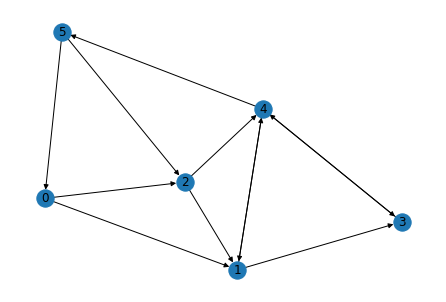

<Figure size 432x288 with 0 Axes>

In [37]:
N = 6
G = nx.DiGraph()
a = [(i, j) for i in range(N) for j in pos[i]] # генерация списка рёбер

G.add_nodes_from(range(N))
G.add_edges_from(a)

nx.draw(G,with_labels=True)

pylab.figure ()
plt.show()

Определим с помощью поиска в ширину кратчайший маршрут:

In [38]:
level, parents = bfs(pos, 0, out=0)

In [39]:
path = PATH(5, parents)
print(path)

[0, 1, 4, 5]


Рассмотрите возможность распаралеливания этого алгоритма и напишите соответстствующую программу:

Статус: `задание не решено`.

# Домашнее задание (базовое):

# Задание 1. Скалярное произведение векторов.

Напишите программу, реализующую каскадное скалярное произведение векторов.

In [40]:
from concurrent.futures import ThreadPoolExecutor, as_completed
import numpy as np

In [41]:
v1 = np.array(list(map(float, input('Введите координаты первого вектора через пробел: ').split())))
v2 = np.array(list(map(float, input('Введите координаты второго вектора через пробел: ').split())))

sum = 0
with ThreadPoolExecutor(max_workers=4) as executor:
    results = [executor.submit(lambda fx: fx[0] * fx[1], [v1[i], v2[i]]) for i in range(len(v1))]
    for future in as_completed(results):
        sum += future.result()
        
print(f'Результат равен {sum}')

Введите координаты первого вектора через пробел: 1 2 3
Введите координаты второго вектора через пробел: 1 3 4
Результат равен 19.0


# Задание 2. Произведение матриц.

Напишите программу, разделяющую матрицы на подматрицы, осуществляющую паралельное перемножение матриц и объединяющую результаты в одну матрицу.

In [42]:
def concurrentScalarProduct(vs):
    sum = 0
    with ThreadPoolExecutor() as executor:
        results = [executor.submit(lambda fx: fx[0] * fx[1], [vs[0][i], vs[1][i]]) for i in range(len(vs[0]))]
        for future in as_completed(results):
            sum += future.result()
    return sum

In [43]:
def getMatrix():
    return np.array(eval(input('Введите матрицу в одну строку, используя квадратные скобочки и запятые: ')))

In [44]:
def getVectors(matrix, axis=0):
    vectors = []
    if axis != 0:
        matrix = matrix.transpose()
    if len(list(matrix.shape)) <= 1:
        vectors = [list(matrix)]
    else:
        for line in matrix:
            vectors.append(list(line))
    return vectors

In [45]:
def concurrentMatrixProduct(vs1, vs2):
    with ThreadPoolExecutor() as executor:
        holder = [0] * len(vs1) * len(vs2)
        index = 0
        for v1 in vs1:
            for v2 in vs2:
                holder[index] = [v1, v2]
                index += 1
        results = list(executor.map(concurrentScalarProduct, holder))
        results = np.array([results]).reshape(len(vs1), len(vs2))
        return results

In [9]:
# [[1, 6, 5, 3], [7, 8, 4, 2]] 
# [[5, 1, 3, 7], [2, 2, 8, 7], [8, 4, 2, 0], [9, 5, 1, 5]]
vectors1 = getVectors(getMatrix())
vectors2 = getVectors(getMatrix(), axis=1)
print()
print(concurrentMatrixProduct(vectors1, vectors2))

Введите матрицу в одну строку, используя квадратные скобочки и запятые: [[1, 6, 5, 3], [7, 8, 4, 2]]
Введите матрицу в одну строку, используя квадратные скобочки и запятые: [[5, 1, 3, 7], [2, 2, 8, 7], [8, 4, 2, 0], [9, 5, 1, 5]]

[[ 84  48  64  64]
 [101  49  95 115]]


# Задание 3. Алгоритм Флойда.

Одной из основных задач теории графов является поиск всех кратчайших путей в ориентированном взвешенном графе. Её можно решить с помощью алгоритма Флойда. 

Пусть задан ориентированный взвешенный граф:

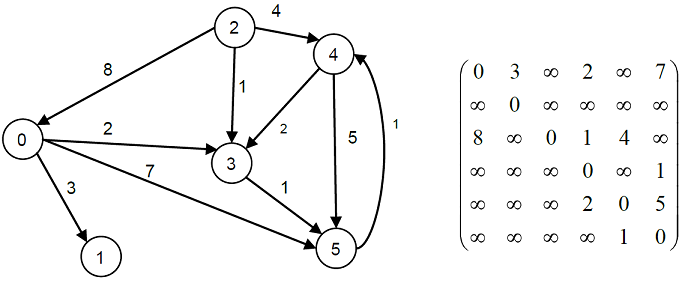

In [18]:
# Так можно добавлять картинки

from IPython.display import Image         # вызов из библиотеки определённой функции
Image("Алгоритм Флойда.png")              # вызов функции и передача ей в качестве аргумента пути к файлу 

# (в данном случае фаил находится в той же папке)

In [46]:
from math import inf

In [47]:
# по вертикали - точки, откуда идём
# по горизонтали - точки, куда идём
A = np.array(
#     (0)  (1)  (2)  (3)  (4)  (5)
    [[ 0,   3,  inf,  2,  inf,  7 ],
     [inf,  0,  inf, inf, inf, inf],
     [ 8,  inf,  0,   1,   4,  inf],
     [inf, inf, inf,  0,  inf,  1 ],
     [inf, inf, inf,  2,   0,   5 ],
     [inf, inf, inf, inf,  1,   0 ]])

In [48]:
def Floyd(A):
    F = A.copy()
    n = len(F)
    for k in range(n): 
        for i in range(n): 
            for j in range(n): 
                F[i][j] = min(F[i][j], F[i][k] + F[k][j])
    return F

In [49]:
print(Floyd(A))
# (0) (1) (2) (3) (4) (5).

[[ 0.  3. inf  2.  4.  3.]
 [inf  0. inf inf inf inf]
 [ 8. 11.  0.  1.  3.  2.]
 [inf inf inf  0.  2.  1.]
 [inf inf inf  2.  0.  3.]
 [inf inf inf  3.  1.  0.]]


Проанализируйте возможность распараллеливания этого алгоритма и напишите соответствующую программу, оцените сокращение времени работы.

### Процесс решения

Идея такая: распараллелить либо цикл `k`, либо `i`, либо `j`, либо в парах, либо все. Нужно проверить их работоспособность и понять, что лучше.

In [50]:
from time import time as t

In [51]:
def Floyd(A):
    F = A.copy()
    n = len(F)
    for k in range(n): 
        for i in range(n): 
            for j in range(n): 
                F[i][j] = min(F[i][j], F[i][k] + F[k][j])
    return F

In [52]:
t0 = t()
Floyd(A)
print(t() - t0)
print(Floyd(A))

0.009609222412109375
[[ 0.  3. inf  2.  4.  3.]
 [inf  0. inf inf inf inf]
 [ 8. 11.  0.  1.  3.  2.]
 [inf inf inf  0.  2.  1.]
 [inf inf inf  2.  0.  3.]
 [inf inf inf  3.  1.  0.]]


In [53]:
def Floyd_K(A):
    F = A.copy()
    n = len(F)
    with ThreadPoolExecutor() as executor:
        F = np.array(list(executor.map(
            lambda fx: min(F[fx[0]][fx[1]], F[fx[0]][fx[2]] + F[fx[2]][fx[1]]), 
            ([i, j, k] 
             for k in range(n) 
             for i in range(n) 
             for j in range(n))
        ))).reshape(n, n, -1)
    return F

In [54]:
t0 = t()
Floyd_K(A)
print(t() - t0)
print(Floyd_K(A))

0.042054176330566406
[[[ 0.  3. inf  2. inf  7.]
  [inf  0. inf inf inf inf]
  [ 8. 11.  0.  1.  4. 15.]
  [inf inf inf  0. inf  1.]
  [inf inf inf  2.  0.  5.]
  [inf inf inf inf  1.  0.]]

 [[ 0.  3. inf  2. inf  7.]
  [inf  0. inf inf inf inf]
  [ 8. inf  0.  1.  4. inf]
  [inf inf inf  0. inf  1.]
  [inf inf inf  2.  0.  5.]
  [inf inf inf inf  1.  0.]]

 [[ 0.  3. inf  2. inf  7.]
  [inf  0. inf inf inf inf]
  [ 8. inf  0.  1.  4. inf]
  [inf inf inf  0. inf  1.]
  [inf inf inf  2.  0.  5.]
  [inf inf inf inf  1.  0.]]

 [[ 0.  3. inf  2. inf  3.]
  [inf  0. inf inf inf inf]
  [ 8. inf  0.  1.  4.  2.]
  [inf inf inf  0. inf  1.]
  [inf inf inf  2.  0.  3.]
  [inf inf inf inf  1.  0.]]

 [[ 0.  3. inf  2. inf  7.]
  [inf  0. inf inf inf inf]
  [ 8. inf  0.  1.  4.  9.]
  [inf inf inf  0. inf  1.]
  [inf inf inf  2.  0.  5.]
  [inf inf inf  3.  1.  0.]]

 [[ 0.  3. inf  2.  8.  7.]
  [inf  0. inf inf inf inf]
  [ 8. inf  0.  1.  4. inf]
  [inf inf inf  0.  2.  1.]
  [inf inf inf  2

То, что `F` на самом деле содержит 216 элементов, дало мне понять, что `k` всего лишь обновляет результаты, поэтому не может быть использован для распараллеливания. Может быть, для очереди - да, но так - это всего лишь последовательное прохождение, оно должно быть выполнено шаг за шагом, потому что данные важны: они меняются при каждом `k`.

In [55]:
def Floyd_I(A):
    F = A.copy()
    n = len(F)
    for k in range(n):
        with ThreadPoolExecutor() as executor:
            F = np.array(list(executor.map(
                lambda fx: min(F[fx[0]][fx[1]], F[fx[0]][fx[2]] + F[fx[2]][fx[1]]), 
                ([i, j, k] 
                 for i in range(n) 
                 for j in range(n))
            ))).reshape(n, -1)
    return F

In [56]:
t0 = t()
Floyd_I(A)
print(t() - t0)
print(Floyd_I(A))

0.05070018768310547
[[ 0.  3. inf  2.  4.  3.]
 [inf  0. inf inf inf inf]
 [ 8. 11.  0.  1.  3.  2.]
 [inf inf inf  0.  2.  1.]
 [inf inf inf  2.  0.  3.]
 [inf inf inf  3.  1.  0.]]


Попробуем распараллелить по `J`:

In [57]:
def Floyd_J(A):
    F = A.copy()
    n = len(F)
    for k in range(n):
        for i in range(n):
            with ThreadPoolExecutor() as executor:
                F[i] = list(executor.map(
                    lambda fx: min(F[fx[0]][fx[1]], F[fx[0]][fx[2]] + F[fx[2]][fx[1]]), 
                    ([i, j, k] 
                     for j in range(n))
                ))
    return F

In [58]:
t0 = t()
print(Floyd_J(A))
print(t() - t0)

[[ 0.  3. inf  2.  4.  3.]
 [inf  0. inf inf inf inf]
 [ 8. 11.  0.  1.  3.  2.]
 [inf inf inf  0.  2.  1.]
 [inf inf inf  2.  0.  3.]
 [inf inf inf  3.  1.  0.]]
0.12469244003295898


### Недоделанный супервариант

Немного подумав, я понял, что для работы выражения `min(F[i][j], F[i][k] + F[k][j])` в первом варианте программы (`Floyd_K`) нужно на каждом шаге `k` подождать вычисления `k`-ой строки и k-го столбца: тогда мы в каждом треде будем иметь актуальные данные для сравнения.

В распараллеливании по `I` мы проходим по одной строке, поэтому для нас необходимо будет получить 7 элементов: `F[i][k]` (он будет один) и `F[k][j]` (их будет шесть).

А ещё конструкция карты нам не подходит, и поэтому нужно всё будет делать ручками. Для начала - несколько сравнений.

In [59]:
B = A.copy()
t0 = t()
B[0][0] = 1
t1 = t() - t0
print(t1)
C = [[ 0,   3,  inf,  2,  inf,  7 ],
     [inf,  0,  inf, inf, inf, inf],
     [ 8,  inf,  0,   1,   4,  inf],
     [inf, inf, inf,  0,  inf,  1 ],
     [inf, inf, inf,  2,   0,   5 ],
     [inf, inf, inf, inf,  1,   0 ]]
t0 = t()
C[0][0] = 1
t1 = t() - t0
print(t1)

0.0002689361572265625
0.00020194053649902344


Ручное задание массивов эффективнее задания при помощи `numpy`.

In [60]:
t0 = t()
q = Queue(36)
t_c = t() - t0
print('t_c', t_c)
t0 = t()
for i in range(6):
    q.put(i)
t1 = t() - t0
print(t1)
q = Queue(6)
t0 = t()
q.put(0)
t1 = t() - t0
print(t1)

t_c 0.0002834796905517578
0.00032448768615722656
0.0007615089416503906


In [61]:
q = [0] * 36
t0 = t()
for i in range(6):
    q[i] = i
t1 = t() - t0
print(t1)
q = [0] * 6
t0 = t()
q[0] = 0
t1 = t() - t0
print(t1)

0.00022149085998535156
0.00019359588623046875


Вышеизложенное говорит, что можно создавать очереди длины `N ** 2`, чтобы использовать в новом алгоритме, и его скорость всё равно нас не сильно ограничивает.

### Глава 1. Об алгоритме, очередях, каскадном трединге

Идея заключается в следующем. На каждом шаге `k` - это точка, путь из которой (в которую) мы сравниваем с уже имеющимся. Мы должны иметь актуальную версию всех путей из `k` и в `k`, поэтому нам для запуска следующего пула потоков нужно дождаться вычисления `k`-го столбца. 

Не `k`-ой строки! На этой строке изначально стоит специальный блокировщик, который ставит замок на все невычисленные элементы. Будет достаточно вычислить `k`-ый столбец, чтобы начать считать (это также подразумевает вычисление `k`-го элемента `k`-ой строки).

После просчёта 2-го столбца на шаге `k == 1` `ParentThread` (поток второй строки) запускает 5 новых потоков и `ParentThread` 3-ей строки, который будет управлять ожиданием 3-го столбца.

`ParentThread(k)` не продолжает свою работу, пока не получит все 5 результатов из очередей третьего столбца; в это время некоторые треды смогут досчитать до конца и завершить работу.

По умолчанию точка `k` на 1-ом шаге просчитана, поэтому `ParentThread` начинается на второй строке. Ещё его функция по запуску новых тредов должна выключаться на последнем шаге, когда `k == 6`. `ParentThread` не может получить из очередей для 7-ых элементов хоть что-то; их в принципе не существует.

### Глава 2. О чётких ограничениях

Нужно понимать, что точно недопустимо в данном алгоритме:

- недопустимо, когда тред `i`-ой строки пересчитывает `j`-ый элемент на `k`-ом ходе, в то время как на `k - 1` ходе не просчитан этот элемент ("порядок строки")
- недопустимо, чтобы начинался тред `k`-го хода, когда `k`-ый столбец не посчитан на `k - 1` ходе ("порядок шагов").

#### Глава 2.1. 30+ часов лабораторной работы

Ограничение "Порядка шагов" было легко понять. На понимание ограничения "Порядка строки", особенно на понимание, как это построить, ушло много времени. Тем не менее, я польщён: это была лучшая лаба в моей жизни, потому что мне действительно нравится думать над этим, своим, жутко устроенном, да, но тем не менее своим алгоритмом.

И я вспомнил про... родителей.

Мы можем передавать в потоки **родителей** и вешать в родителях замки на непосчитанные элементы! Чудеса! Самое ведь прикольное, что это тоже выполняется отдельно, то есть поток родителя не затрагивается - только текущий!

Приступим!

In [62]:
from threading import Thread

In [63]:
class Counter(Thread):
    def __init__(self, parent, i, k, n):
        Thread.__init__(self)
        self.parent = parent
        self.i = i
        self.k = k
        self.n = n
        
    def start(self):
        global AdjacencyMatrix
        global HoldUntilKQueues
        for j in range(n):
            ValueKJ = HoldUntilKQueues[k][j].get()
            ValueIK = HoldUntilKQueues[i][k].get()
            HoldUntilKQueues[k][j].put(ValueKJ) # для того, чтобы другие треды тоже могли пользоваться этим значением
            HoldUntilKQueues[i][k].put(ValueIK)
            AdjacencyMatrix[self.i][j] = min(AdjacencyMatrix[self.i][j], 
                                             ValueIK + ValueKJ)

In [64]:
class ParentThread(Thread):
    def __init__(self, i, k, n):
        Thread.__init__(self)
        self.i = i
        self.k = k
        
    def start(self):
        pass

### Глава 4. Задаём технологии: очереди, матрицу смежности, общую функцию

Это невероятно классно - понимать, когда у тебя в один из моментов времени могут работать вплоть до `N ** 2` тредов. Но... каким образом мы выстроим структуру взаимосвязи между потоками?

- массив очередей `HoldUntilKQueues(maxsize = 1)` размером `N * N`: 

### Глава 5. Хуже только рекурсия (не факт!)

На самом деле, просчитывая алгоритм Флойда таким образом, задумываешься, а не лучше ли использовать динамику или рекурсию... Потому что первый вопрос, который возникает, когда на это смотришь, - 
>"Это как?"

Keep calm and keep going. Суммарное время на запуск всех этих процессов превышает время выполнения алгоритма Флойда в лоб раз в тысячу, наверное... Сначала ведь нужно его написать.

Статус суперварианта: `задание решено не до конца`.